## 这一次介绍牛顿法，优点是二阶收敛，收敛快。缺点是需要求海森矩阵的逆，计算量大，且不一定有解

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

牛顿法的核心便是选取极值点的临近点作为初始点，以此点切线于x轴的交点作为$x$的更新点，不断反复直至收敛，用公式来表示如下：$$ x_{k+1}=x_k - H^{-1}(x)\bigtriangledown f(x)$$ 
其中$H^{-1}(x)$为海森矩阵
选取函数 $$ y=100(x_2-x_1)^2+(1-x_1)^2 \tag{1}$$
于是可得函数的梯度$$g(x)=\bigtriangledown f(x)=(-400(x_2 - x_1^2)x_1-2(1-x_1), 200(x_2-x_1^2))^T$$
函数$f(x)$的Hesse矩阵为$$
\left \{\begin{matrix}
-400(x_2-dx_1^2)+2 & -400x_1  \\
-400x_1 & 200  \\
\end{matrix}
\right \}
$$

In [6]:
def jacobian(x):
    """
    返回函数的梯度
    """
    return np.array([-400*x[0]*(x[1]-x[0]**2)-2*(1-x[0]),200*(x[1]-x[0]**2)])

def hessian(x):
    """
    返回函数的海森矩阵
    """
    return np.array([[-400*(x[1]-3*x[0]**2)+2,-400*x[0]],[-400*x[0],200]])

则现在开始实现函数

In [11]:
def newton(x0):
    """
    使用牛顿法来求极值
    """
    print('初始点为:')
    print(x0,'\n')
    W=np.zeros((2,10**3))
    i = 1
    imax = 1000
    W[:,0] = x0 
    x = x0
    # 定义容忍误差
    delta = 1

    while i<imax and delta>10**(-5):
        p = -np.dot(np.linalg.inv(hessian(x)),jacobian(x))
        x0 = x
        x = x + p
        W[:,i] = x
        # 计算容忍误差
        delta = sum((x-x0)**2)
        print('第',i,'次迭代结果:')
        print(x,'\n')
        i=i+1
    W=W[:,0:i]  # 记录迭代点
    return W

初始点为:
[-1.2  1. ] 

第 1 次迭代结果:
[-1.1752809   1.38067416] 

第 2 次迭代结果:
[ 0.76311487 -3.17503385] 

第 3 次迭代结果:
[0.76342968 0.58282478] 

第 4 次迭代结果:
[0.99999531 0.94402732] 

第 5 次迭代结果:
[0.9999957  0.99999139] 

第 6 次迭代结果:
[1. 1.] 



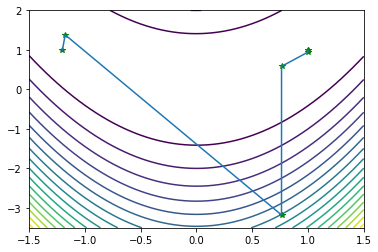

In [12]:
X1=np.arange(-1.5,1.5+0.05,0.05)
X2=np.arange(-3.5,2+0.05,0.05)
[x1,x2]=np.meshgrid(X1,X2)
f=100*(x2-x1**2)**2+(1-x1)**2; # 给定的函数
plt.contour(x1,x2,f,20) # 画出函数的20条轮廓线
x0 = np.array([-1.2,1])
W=newton(x0)

plt.plot(W[0,:],W[1,:],'g*',W[0,:],W[1,:]) # 画出迭代点收敛的轨迹
plt.show()